In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
# Load the dataset
file_path = "/Users/simonknudsen/Downloads/ESS11/ESS11.csv"  # Update file path if needed
df = pd.read_csv(file_path, low_memory=False)

In [3]:
# Handle missing data
print(df.info())  # Check missing values
df = df.dropna(subset=['edulvlb', 'edulvlfb', 'edulvlmb'])  # Drop rows missing key columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40156 entries, 0 to 40155
Columns: 640 entries, name to psu
dtypes: float64(228), int64(388), object(24)
memory usage: 196.1+ MB
None


In [4]:
# Education level grouping
education_groups = {
    # Higher Education
    510: "Higher Education", 520: "Higher Education",
    610: "Higher Education", 620: "Higher Education",
    710: "Higher Education", 720: "Higher Education",
    800: "Higher Education",

    # Upper Secondary
    311: "Upper Secondary", 312: "Upper Secondary",
    313: "Upper Secondary", 321: "Upper Secondary",
    322: "Upper Secondary", 323: "Upper Secondary",
    412: "Upper Secondary", 413: "Upper Secondary",
    421: "Upper Secondary", 422: "Upper Secondary",
    423: "Upper Secondary",

    # Lower Education
    0: "Lower Education", 113: "Lower Education",
    129: "Lower Education", 212: "Lower Education",
    213: "Lower Education", 221: "Lower Education",
    222: "Lower Education", 223: "Lower Education",
    229: "Lower Education",

    # Other
    5555: "Other"
}

In [5]:
# Apply the grouping
for col in ['edulvlb', 'edulvlfb', 'edulvlmb']:
    df[f'{col}_grouped'] = df[col].map(education_groups)

In [6]:
# Define features and target
target_variable = 'edulvlb_grouped'  # Grouped target variable
features = ['edulvlfb_grouped', 'edulvlmb_grouped', 'hincfel', 'ppltrst', 'pplfair',
            'health', 'happy', 'stflife', 'gndr', 'agea', 'cntry']

In [7]:
# Separate features and target variable
X = df[features].copy()
y = df[target_variable].copy()

In [8]:
# Encode categorical variables
le = LabelEncoder()

In [9]:
# Encode the target variable
y = le.fit_transform(y)

In [10]:
# Encode categorical features
categorical_features = ['edulvlfb_grouped', 'edulvlmb_grouped', 'cntry', 'gndr']
for col in categorical_features:
    X[col] = le.fit_transform(X[col])

In [11]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [13]:
# Fit the logistic regression model
log_reg = LogisticRegression(max_iter=5000, solver='saga', class_weight='balanced')  # Use 'saga' solver for better convergence
log_reg.fit(X_train, y_train)

/Users/simonknudsen/opt/anaconda3/envs/machinelearning/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(class_weight='balanced', max_iter=5000, solver='saga')

In [14]:
# Evaluate the model
y_train_pred = log_reg.predict(X_train)
y_test_pred = log_reg.predict(X_test)

In [15]:
print("Training Accuracy:", accuracy_score(y_train, y_train_pred))
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))
print("\nClassification Report (Test Set):")
print(classification_report(y_test, y_test_pred))
print("\nConfusion Matrix (Test Set):")
print(confusion_matrix(y_test, y_test_pred))

Training Accuracy: 0.32399452123023287
Test Accuracy: 0.3270667330677291

Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.46      0.51      0.49      2635
           1       0.40      0.40      0.40      1795
           2       0.00      0.07      0.00        27
           3       0.54      0.15      0.24      3550
           4       0.02      0.72      0.03        25

    accuracy                           0.33      8032
   macro avg       0.28      0.37      0.23      8032
weighted avg       0.48      0.33      0.35      8032


Confusion Matrix (Test Set):
[[1345  393  329  276  292]
 [ 440  718  243  174  220]
 [  11    5    2    5    4]
 [1114  691  580  544  621]
 [   0    3    2    2   18]]


In [16]:
# Visualize feature importance
coefficients = log_reg.coef_[0]  # Coefficients for the logistic regression model
feature_names = X.columns
importance = np.abs(coefficients)

In [17]:
# Sort features by importance
sorted_idx = np.argsort(importance)[::-1]
sorted_features = feature_names[sorted_idx]
sorted_importance = importance[sorted_idx]

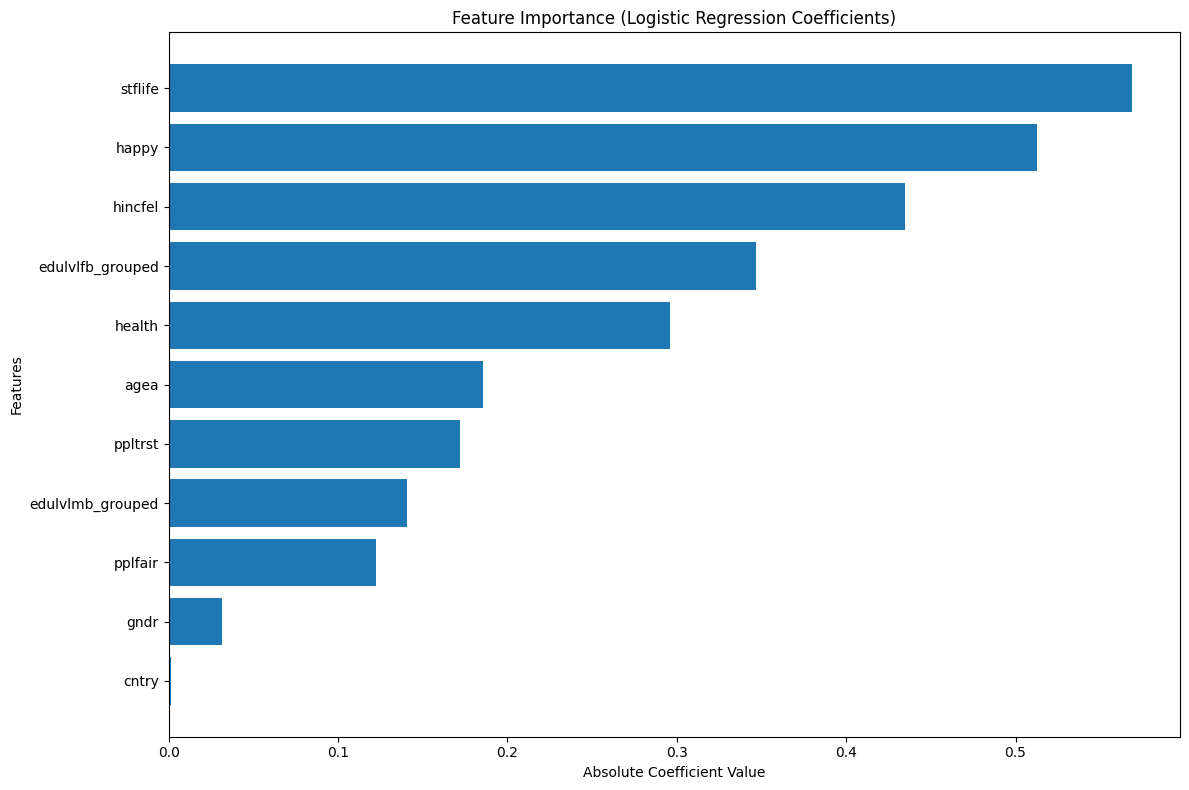

In [18]:
# Plot the feature importance
plt.figure(figsize=(12, 8))
plt.barh(range(len(sorted_importance)), sorted_importance, align='center')
plt.yticks(range(len(sorted_importance)), sorted_features)
plt.gca().invert_yaxis()  # Most important feature at the top
plt.title("Feature Importance (Logistic Regression Coefficients)")
plt.xlabel("Absolute Coefficient Value")
plt.ylabel("Features")
plt.tight_layout()
plt.show()